In [1]:
# Decision Tree Classification on Iris Dataset


# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
#Load the Iris dataset (built-in dataset from sklearn)
iris = load_iris()               # Load dataset
X = iris.data                    # Features (measurements of flowers)
y = iris.target                  # Target labels (species)

In [5]:
# Show dataset information
print("Features:", iris.feature_names)
print("Target classes:", iris.target_names)
print("Shape of dataset:", X.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Shape of dataset: (150, 4)


In [9]:
# Split data into training and testing sets
# test_size=0.3 means 30% data for testing, random_state=42 ensures same split every time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [11]:
# Create the Decision Tree model
# criterion='entropy' means using Information Gain to split nodes
# max_depth=3 limits tree depth to avoid overfitting
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


In [13]:
# Train (fit) the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)


In [15]:
#Evaluate the model
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



 Accuracy: 0.9777777777777777

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



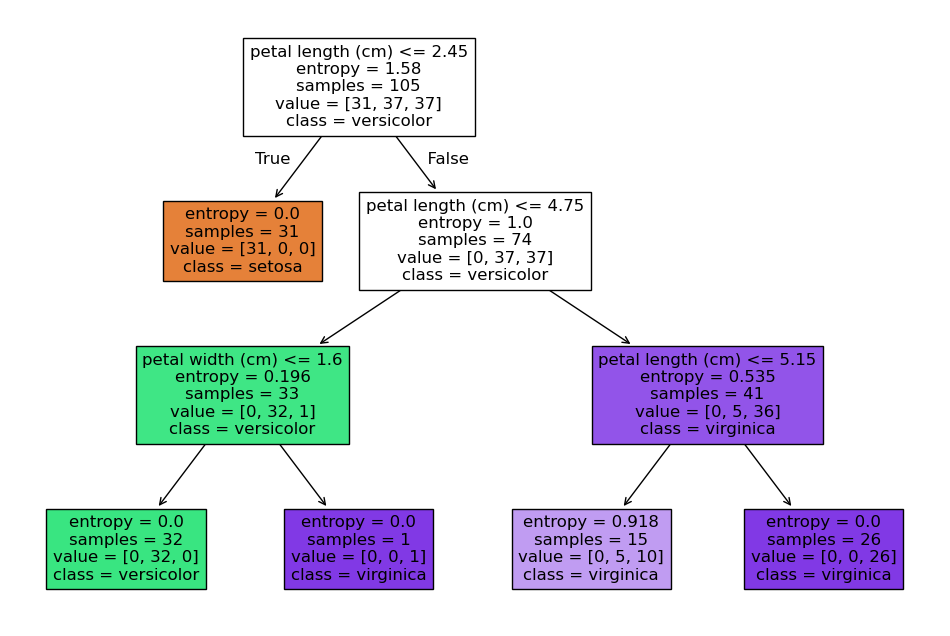

In [17]:
#Visualize the Decision Tree
plt.figure(figsize=(12,8))  # Set figure size for better visibility
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [19]:
#Show feature importance (which features are most important for classification)
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)



Feature Importance:
              Feature  Importance
2  petal length (cm)    0.957507
3   petal width (cm)    0.042493
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000
